In [72]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle

In [73]:
muon_mass = 0.1056583755 #GeV/c^2

folder = "/home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/"
filetitle = "MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS"

png = ".png"
folder+=filetitle+"/"
filename = folder+filetitle+".root"
#filename ="test.root"
#garlitetest_nosmear_perfectseed_allhits_elosscorrpred_r5_5.root

file = ROOT.TFile(filename)
t=file.Get("t1s")      


In [74]:
hp0test   = ROOT.TH1D( 'hp0test', 'p0 Residuals Seed', 101, -12, 12 )
hp1test   = ROOT.TH1D( 'hp1test', 'p1 Residuals Seed', 101, -12, 12 )
hp2test   = ROOT.TH1D( 'hp2test', 'p2 Residuals Seed', 101, -12, 12 )
hp3test   = ROOT.TH1D( 'hp3test', 'p3 Residuals Seed', 101, -12, 12 )
hp4test   = ROOT.TH1D( 'hp4test', 'p4 Residuals Seed', 101, -12, 12 )

hpKalman   = ROOT.TH1D( 'hpKalman', 'Kalman p Residuals', 101, -0.4, 0.4 )
hpHelix   = ROOT.TH1D( 'hpHelix', 'Standard GAr-Lite p Residuals', 101, -0.4, 0.4 )
hpHelixNew   = ROOT.TH1D( 'hpHelixNew', 'Helix p Residuals', 101, -0.4, 0.4 )

hp4Kalman   = ROOT.TH1D( 'hinvpKalman', 'Kalman q/pT Residuals', 101, -0.5, 0.5 )
hp4Helix   = ROOT.TH1D( 'hinvpHelix', 'Standard GAr-Lite q/pT Residuals', 101, -0.5, 0.5 )
hp4HelixNew   = ROOT.TH1D( 'hinvpHelixNew', 'Helix q/pT Residuals', 101, -0.5, 0.5 )

hp0Kalman   = ROOT.TH1D( 'hp0Kalman', 'Kalman y Residuals', 101, -0.05, 0.05 )
hp0HelixNew   = ROOT.TH1D( 'hp0HelixNew', 'Helix y Residuals', 101, -0.05, 0.05 )
hp1Kalman   = ROOT.TH1D( 'hp1Kalman', 'Kalman x Residuals', 101, -5, 5 )
hp1HelixNew   = ROOT.TH1D( 'hp1HelixNew', 'Helix x Residuals', 101, -5, 5 )
hp2Kalman   = ROOT.TH1D( 'hp2Kalman', 'Kalman sin#phi Residuals', 101, -1, 1 )
hp2HelixNew   = ROOT.TH1D( 'hp2HelixNew', 'Helix sin#phi Residuals', 101, -1, 1 )
hp3Kalman   = ROOT.TH1D( 'hp3Kalman', 'Kalman tan#lambda Residuals', 101, -1, 1 )
hp3HelixNew   = ROOT.TH1D( 'hp3HelixNew', 'Helix tan#lambda Residuals', 101, -1, 1 )

Formula = "0.39894228040143*"+str(hpKalman.GetBinWidth(0))+"*([0]/[2])*(exp(-0.5*((x-[1])/[2])^2)+[3]*exp(-0.5*((x-([1]+[4]))/[5])^2)*([2]/[5]))"
double_gauss0 = ROOT.TF1("double_gauss0",Formula,-0.4,0.4)
double_gauss1 = ROOT.TF1("double_gauss1",Formula,-0.4,0.4)
double_gauss2 = ROOT.TF1("double_gauss2",Formula,-0.4,0.4)


In [75]:
count=0
for iev in range(t.GetEntries()):
    t.GetEntry(iev)

    #if(t.status==0): continue
    
    yMC = t.xyz_MC.Y()
    xMC = t.xyz_MC.X()
    sinphiMC = t.sinphi_MC   
    tanlambdaMC = t.tanlambda_MC
    invpTMC = t.invpT_MC
    p_MC = np.sqrt(t.pxyz_MC.Mag2())
    
    ySeed = t.xyz_seed.Y()
    xSeed = t.xyz_seed.X()
    sinphiSeed= t.sinphi_seed
    tanlambdaSeed=t.tanlambda_seed
    invpTSeed = t.invpT_seed
    pSeed = np.sqrt(t.pxyz_seed.Mag2())

    ySeedOld = t.xyz_seed_old.Y()
    xSeedOld = t.xyz_seed_old.X()
    sinphiSeedOld= t.sinphi_seed_old
    tanlambdaSeedOld=t.tanlambda_seed_old
    invpTSeedOld = t.invpT_seed_old
    pSeedOld = np.sqrt(t.pxyz_seed_old.Mag2())

     

    if(t.status==1) :
        pKalman = np.abs((1/np.cos(np.arctan(t.parvect_bkw.at(t.parvect_bkw.size()-1)[3])))/t.parvect_bkw.at(t.parvect_bkw.size()-1)[4])
        invpTKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[4]
        yKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[0]
        xKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[1]
        sinphiKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[2]
        tanlambdaKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[3]
    else:
        pKalman = pSeed
        invpTKalman = invpTSeed
        yKalman =ySeed
        xKalman =xSeed
        sinphiKalman =sinphiSeed
        tanlambdaKalman = tanlambdaSeed

    #pKalman = np.abs((1/np.cos(np.arctan(t.parvect_bkw.at(t.parvect_bkw.size()-1)[3])))/t.parvect_bkw.at(t.parvect_bkw.size()-1)[4])
    #invpTKalman = t.parvect_bkw.at(t.parvect_bkw.size()-1)[4]

    P00 = t.P_seed[0][0]
    P11 = t.P_seed[1][1]
    P22 = t.P_seed[2][2]
    P33 = t.P_seed[3][3]
    P44 = t.P_seed[4][4]
    
    hp0test.Fill((ySeed-yMC)/np.sqrt(P00))
    hp1test.Fill((xSeed-xMC)/np.sqrt(P11))
    hp2test.Fill((sinphiSeed-sinphiMC)/np.sqrt(P22))
    hp3test.Fill((tanlambdaSeed-tanlambdaMC)/np.sqrt(P33))
    hp4test.Fill((invpTSeed-invpTMC)/np.sqrt(P44))

    hpKalman.Fill((pKalman-p_MC)/p_MC)
    hpHelix.Fill((pSeedOld-p_MC)/p_MC)
    hpHelixNew.Fill((pSeed-p_MC)/p_MC)

    hp4Kalman.Fill((invpTKalman-invpTMC)/invpTMC)
    hp4Helix.Fill((invpTSeedOld-invpTMC)/invpTMC)
    hp4HelixNew.Fill((invpTSeed-invpTMC)/invpTMC)

    hp0Kalman.Fill((yKalman-yMC)/yMC)
    hp0HelixNew.Fill((ySeed-yMC)/yMC)
    hp1Kalman.Fill((xKalman-xMC)/xMC)
    hp1HelixNew.Fill((xSeed-xMC)/xMC)
    hp2Kalman.Fill((sinphiKalman-sinphiMC)/sinphiMC)
    hp2HelixNew.Fill((sinphiSeed-sinphiMC)/sinphiMC)
    hp3Kalman.Fill((tanlambdaKalman-tanlambdaMC)/tanlambdaMC)
    hp3HelixNew.Fill((tanlambdaSeed-tanlambdaMC)/tanlambdaMC)

    
    #if (np.abs((pKalman-p_MC)/p_MC)>np.abs((pSeed-p_MC)/p_MC)): 
    #    print(str(iev)+" "+str((pKalman-p_MC)/p_MC)+" "+str((pSeed-p_MC)/p_MC))
    #    count+=1
#print("tot: "+str(count))

hpKalmanF=hpKalman.Clone()
hpHelixF=hpHelix.Clone()
hpHelixNewF=hpHelixNew.Clone()

 FCN=34.1006 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=2.83107e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.29416e+02   1.14309e+01   2.71116e-02  -4.41261e-06
   2  Mean         1.43403e-02   1.01576e-02   2.92944e-05  -3.88057e-04
   3  Sigma        1.00327e+00   7.07783e-03   5.50627e-06  -3.95166e-02
 FCN=33.1556 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=2.40296e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.26715e+02   1.15549e+01   2.66581e-02   6.45122e-07
   2  Mean         8.00976e-04   1.01573e-02   2.89852e-05  -4.18582e-05
   3  Sigma        1.00678e+00   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Unitp0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Unitp1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2s
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Unitp2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName3s
Info in <TCanvas::Print>: png file /home/federico/Documents/

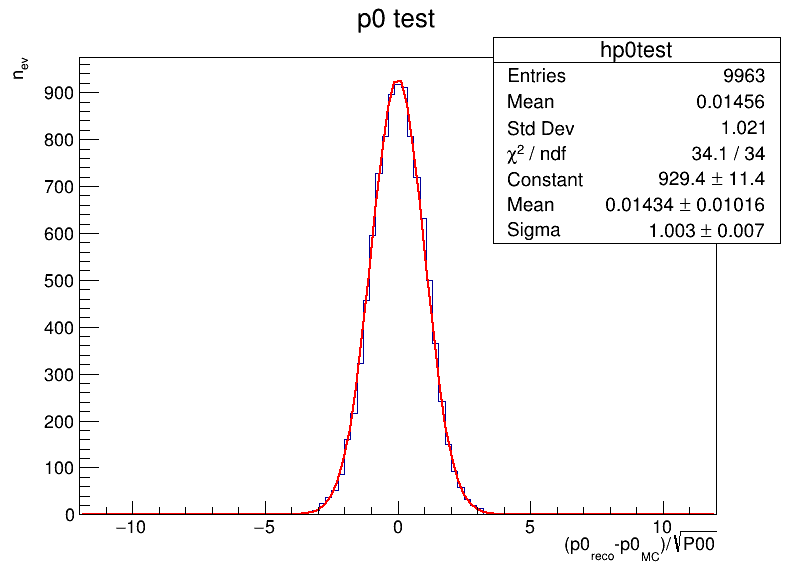

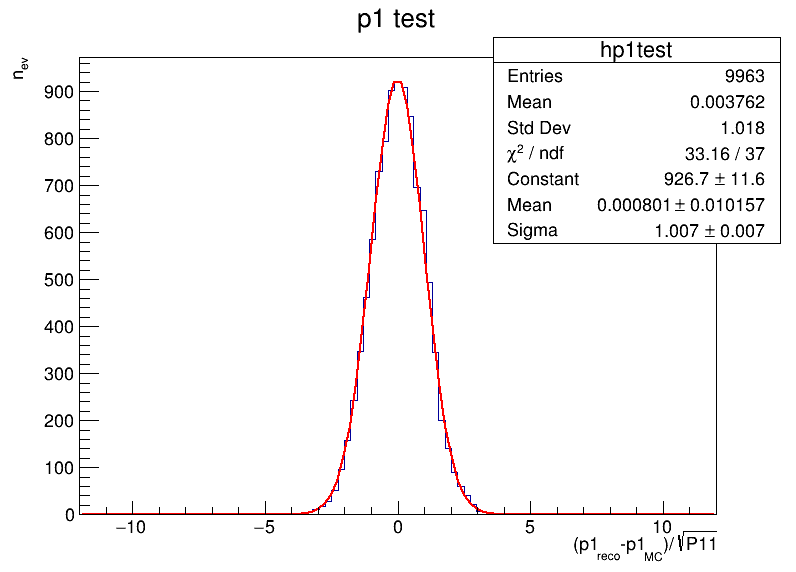

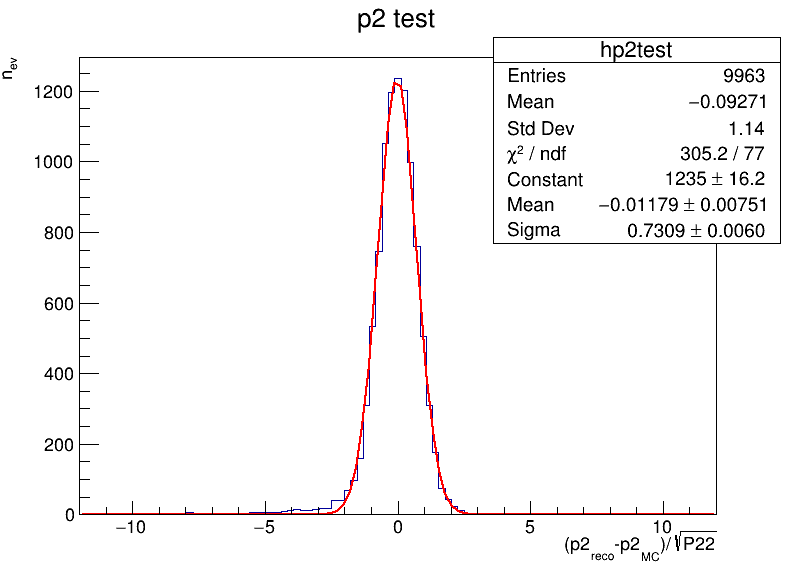

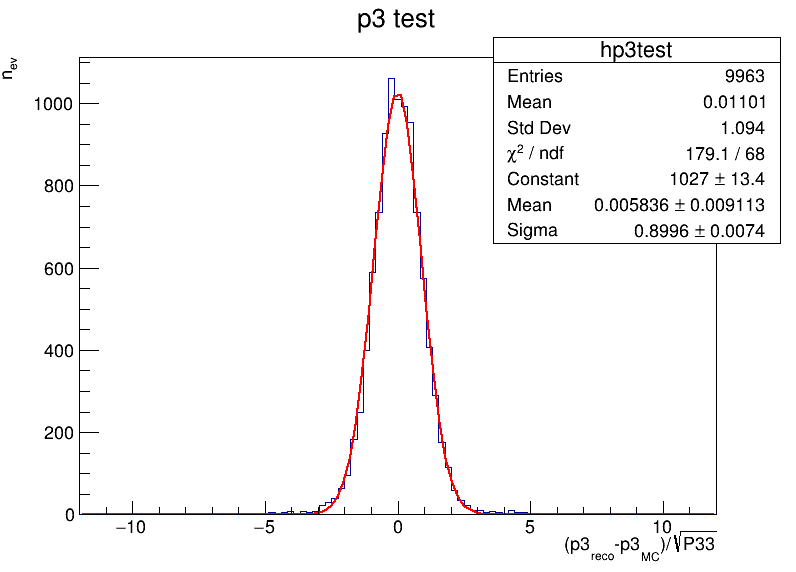

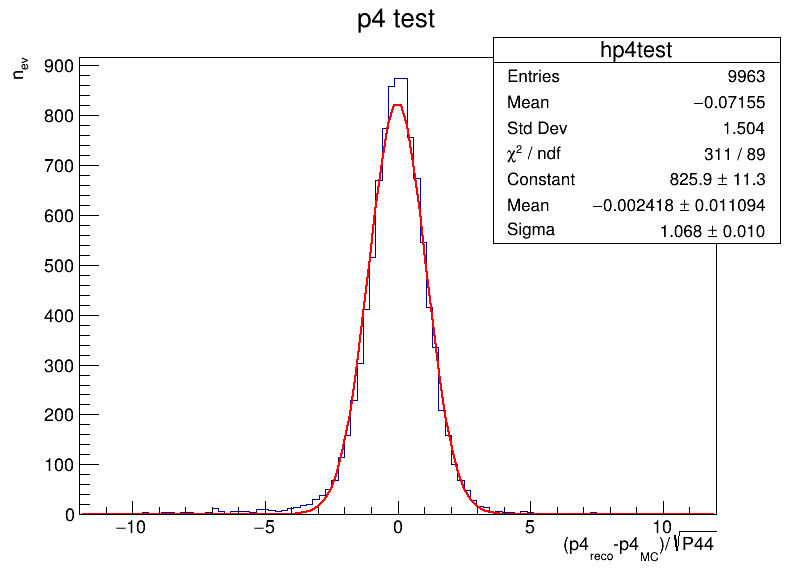

In [76]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

c0s = ROOT.TCanvas("myCanvasName0s","The Canvas Title0s",800,600)
#gPad.SetLogy()
hp0test.SetTitle("p0 test;(p0_{reco}-p0_{MC})/#sqrt{P00};n_{ev}")
hp0test.Fit("gaus")
hp0test.Draw()
c0s.Draw()
save=folder+"Unitp0"+png
c0s.Print(save)

c1s = ROOT.TCanvas("myCanvasName1s","The Canvas Title1s",800,600)
#gPad.SetLogy()
hp1test.SetTitle("p1 test;(p1_{reco}-p1_{MC})/#sqrt{P11};n_{ev}")
hp1test.Fit("gaus")
hp1test.Draw()
c1s.Draw()
save=folder+"Unitp1"+png
c1s.Print(save)

c2s = ROOT.TCanvas("myCanvasName2s","The Canvas Title2s",800,600)
#gPad.SetLogy()
hp2test.SetTitle("p2 test;(p2_{reco}-p2_{MC})/#sqrt{P22};n_{ev}")
hp2test.Fit("gaus")
hp2test.Draw()
c2s.Draw()
save=folder+"Unitp2"+png
c2s.Print(save)

c3s = ROOT.TCanvas("myCanvasName3s","The Canvas Title3s",800,600)
#gPad.SetLogy()
hp3test.SetTitle("p3 test;(p3_{reco}-p3_{MC})/#sqrt{P33};n_{ev}")
hp3test.Fit("gaus")
hp3test.Draw()
c3s.Draw()
save=folder+"Unitp3"+png
c3s.Print(save)

c4s = ROOT.TCanvas("myCanvasName4s","The Canvas Title4s",800,600)
#gPad.SetLogy()
hp4test.SetTitle("p4 test;(p4_{reco}-p4_{MC})/#sqrt{P44};n_{ev}")
hp4test.Fit("gaus")
hp4test.Draw()
c4s.Draw()
save=folder+"Unitp4"+png
c4s.Print(save)

 FCN=128.606 FROM MIGRAD    STATUS=CONVERGED     608 CALLS         609 TOTAL
                     EDM=5.06245e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           7.43575e+03   1.75484e+02   2.22154e-04  -5.31804e-04
   2  p1           5.89093e-05   3.43864e-04   1.73756e-06   1.62619e-02
   3  p2           2.44245e-02   4.57845e-04   1.59180e-06   1.04276e+00
   4  p3           2.64526e-01   2.68712e-02   4.81912e-05   1.76566e-02
   5  p4           6.01812e-03   1.89109e-03   9.35619e-06   3.12894e-02
   6  p5           6.94832e-02   2.87658e-03   8.11250e-06   5.54698e-02
 FCN=130.485 FROM MIGRAD    STATUS=CONVERGED     256 CALLS         257 TOTAL
                     EDM=9.23935e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   3.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      V

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepK
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Kalman_p_Resid_Fit.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepH
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Garlite_p_Resid_Fit.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepHn
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Helix_p_Resid_Fit.png has been created


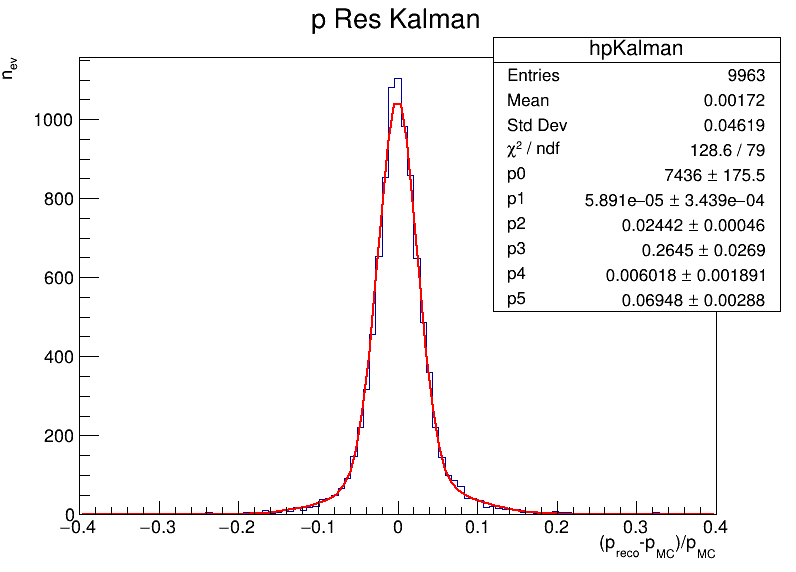

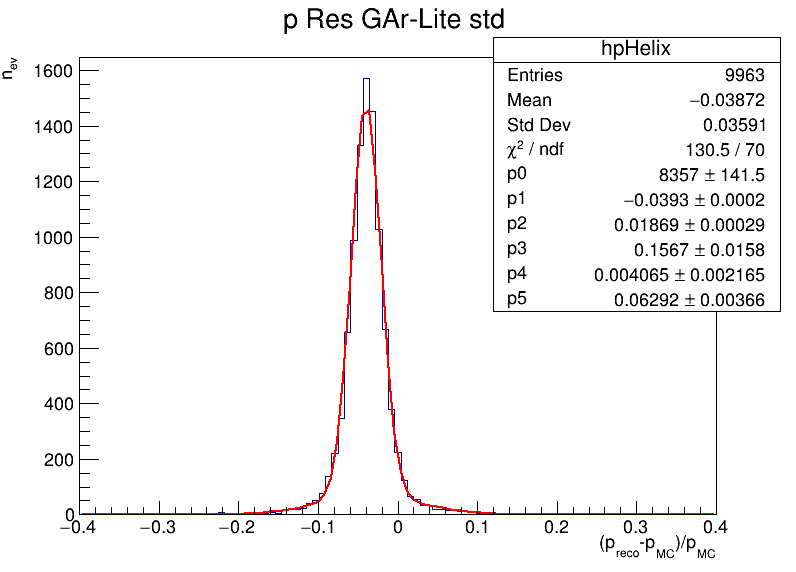

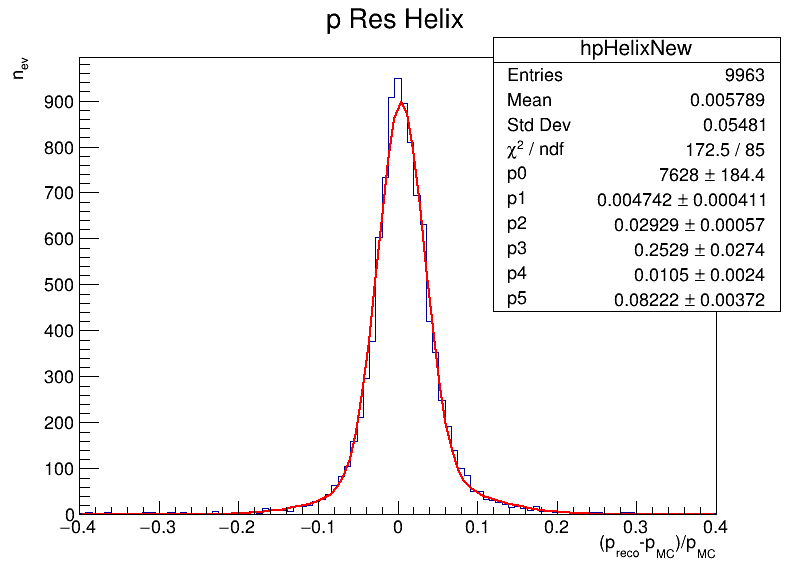

In [77]:
cpK = ROOT.TCanvas("myCanvasNamepK","The Canvas TitlepK",800,600)
#gPad.SetLogy()
hpKalman.SetTitle("p Res Kalman;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
#hpKalman.Fit("gaus")
double_gauss0.SetParLimits(0,6000,10000)
#double_gauss0.SetParLimits(0,0,100000)
double_gauss0.SetParameters(hpKalman.GetEntries(),hpKalman.GetMean(),hpKalman.GetRMS(),0.5,hpKalman.GetRMS(),hpKalman.GetRMS())
hpKalman.Fit("double_gauss0")
hpKalman.Draw()
cpK.Draw()
save=folder+"Kalman_p_Resid_Fit"+png
cpK.Print(save)

cpH = ROOT.TCanvas("myCanvasNamepH","The Canvas TitlepH",800,600)
#gPad.SetLogy()
hpHelix.SetTitle("p Res GAr-Lite std;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
hpHelix.Draw()
#hpHelix.Fit("gaus")
double_gauss1.SetParameters(hpHelix.GetEntries(),hpHelix.GetMean(),hpHelix.GetRMS(),0.5,hpHelix.GetRMS(),hpHelix.GetRMS())
hpHelix.Fit("double_gauss1")
cpH.Draw()
save=folder+"Garlite_p_Resid_Fit"+png
cpH.Print(save)

cpHn = ROOT.TCanvas("myCanvasNamepHn","The Canvas TitlepHn",800,600)
#gPad.SetLogy()
hpHelixNew.SetTitle("p Res Helix;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
#hpHelixNew.Fit("gaus")
double_gauss2.SetParLimits(0,6000,10000)
double_gauss2.SetParameters(hpHelixNew.GetEntries(),hpHelixNew.GetMean(),hpHelixNew.GetRMS(),0.5,hpHelixNew.GetRMS(),hpHelixNew.GetRMS())
hpHelixNew.Fit("double_gauss2")
hpHelixNew.Draw()
cpHn.Draw()
save=folder+"Helix_p_Resid_Fit"+png
cpHn.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepK0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Kalman_p_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepH0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Garlite_p_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNamepHn0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Helix_p_Resid.png has been created


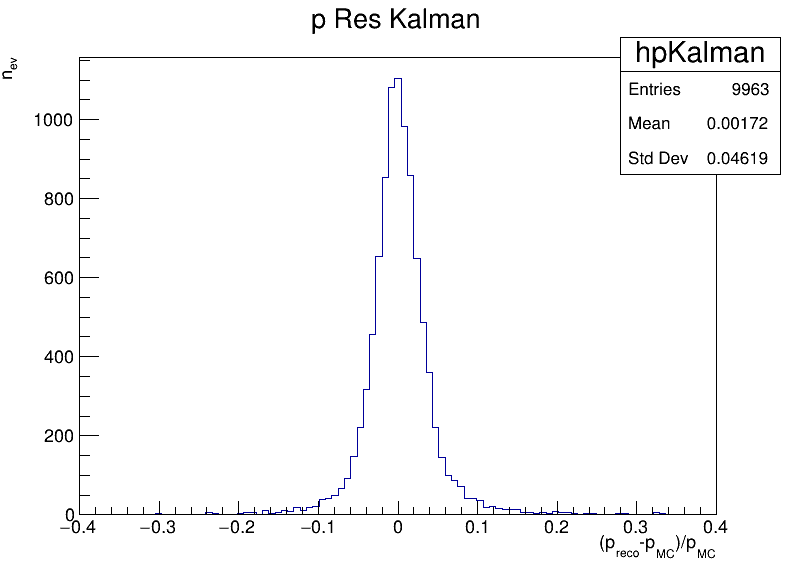

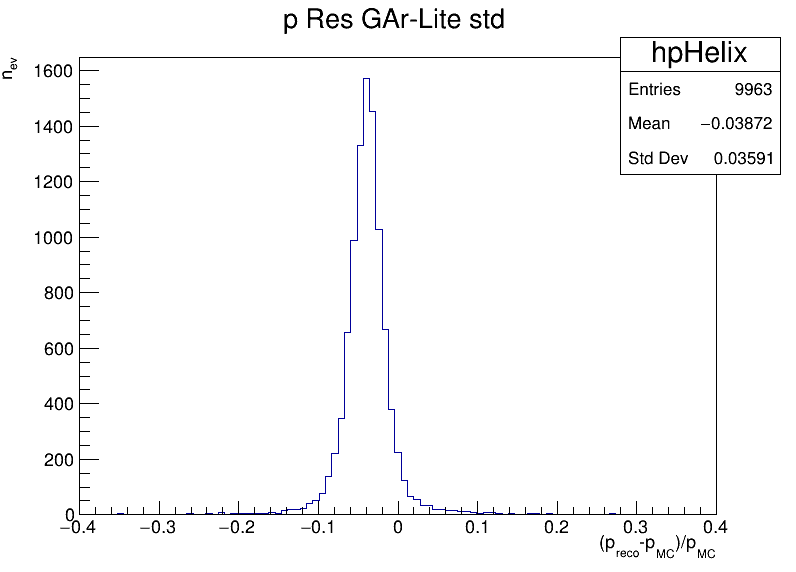

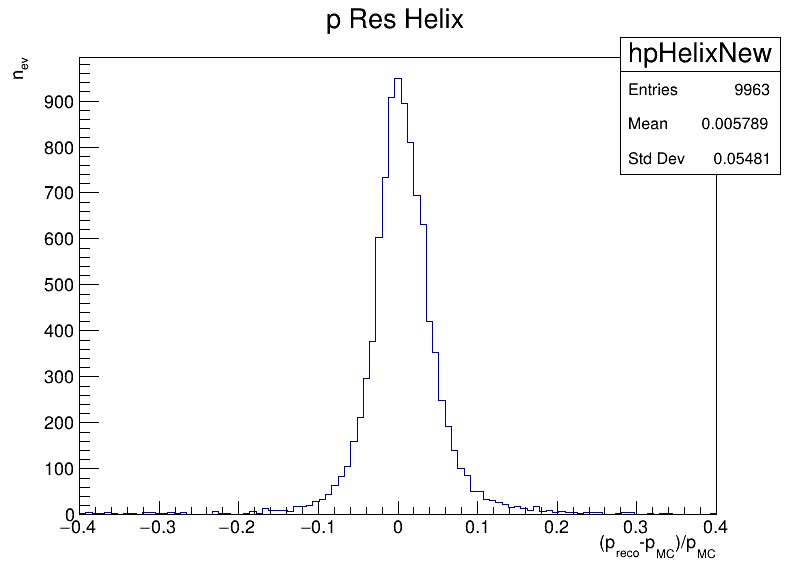

In [78]:
cpK0 = ROOT.TCanvas("myCanvasNamepK0","The Canvas TitlepK0",800,600)
#gPad.SetLogy()
hpKalmanF.SetTitle("p Res Kalman;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
#hpKalman.Fit("gaus")
#double_gauss.SetParameters(hpKalman.GetEntries(),hpKalman.GetMean(),hpKalman.GetRMS(),0.5,hpKalman.GetRMS(),hpKalman.GetRMS())
#hpKalman.Fit("double_gauss")
hpKalmanF.Draw()
cpK0.Draw()
save=folder+"Kalman_p_Resid"+png
cpK0.Print(save)

cpH0 = ROOT.TCanvas("myCanvasNamepH0","The Canvas TitlepH0",800,600)
#gPad.SetLogy()
hpHelixF.SetTitle("p Res GAr-Lite std;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
hpHelixF.Draw()
#hpHelix.Fit("gaus")
#double_gauss.SetParameters(hpHelix.GetEntries(),hpHelix.GetMean(),hpHelix.GetRMS(),0.5,hpHelix.GetRMS(),hpHelix.GetRMS())
#hpHelix.Fit("double_gauss")
cpH0.Draw()
save=folder+"Garlite_p_Resid"+png
cpH0.Print(save)

cpHn0 = ROOT.TCanvas("myCanvasNamepHn0","The Canvas TitlepHn0",800,600)
#gPad.SetLogy()
hpHelixNewF.SetTitle("p Res Helix;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
#hpHelixNew.Fit("gaus")
#double_gauss.SetParameters(hpHelixNew.GetEntries(),hpHelixNew.GetMean(),hpHelixNew.GetRMS(),0.5,hpHelixNew.GetRMS(),hpHelixNew.GetRMS())
#double_gauss.SetParLimits(0,0,10000000)
#hpHelixNew.Fit("double_gauss")
hpHelixNewF.Draw()
cpHn0.Draw()
save=folder+"Helix_p_Resid"+png
cpHn0.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameipK
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Kalman_p4_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameipH
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Garlite_p4_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasNameipHn
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Helix_p4_Resid.png has been created


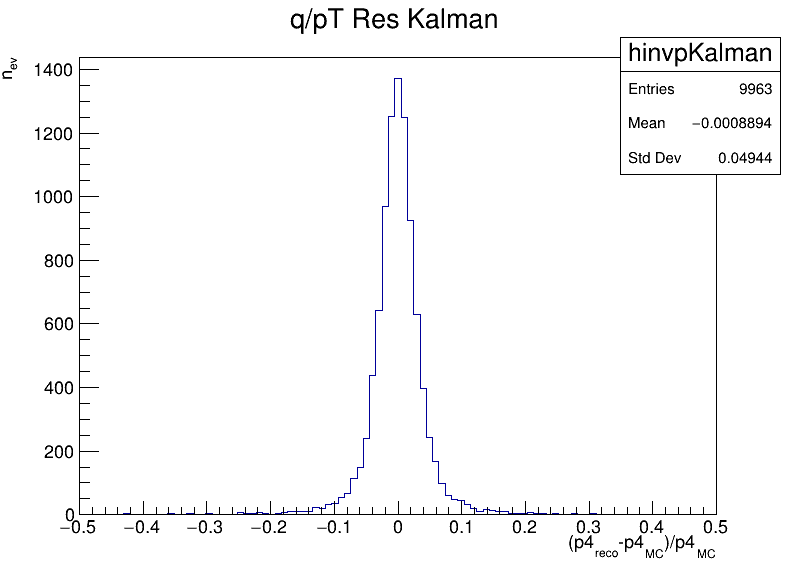

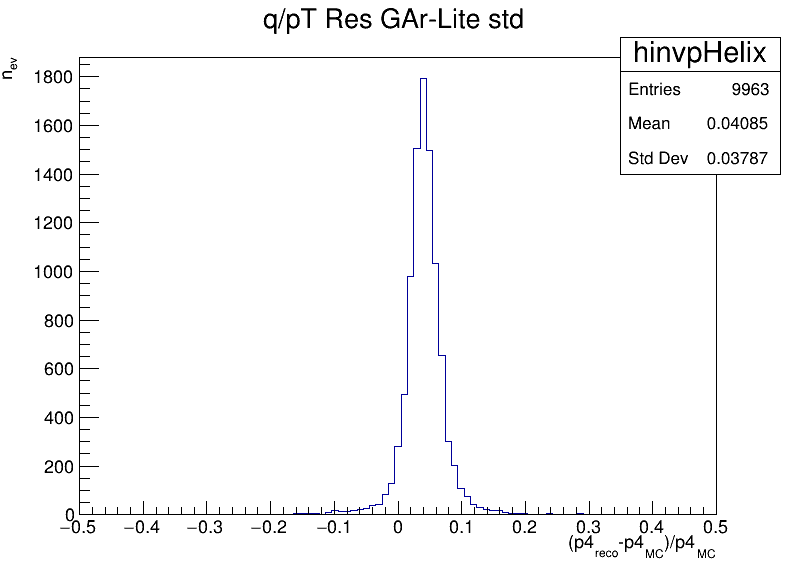

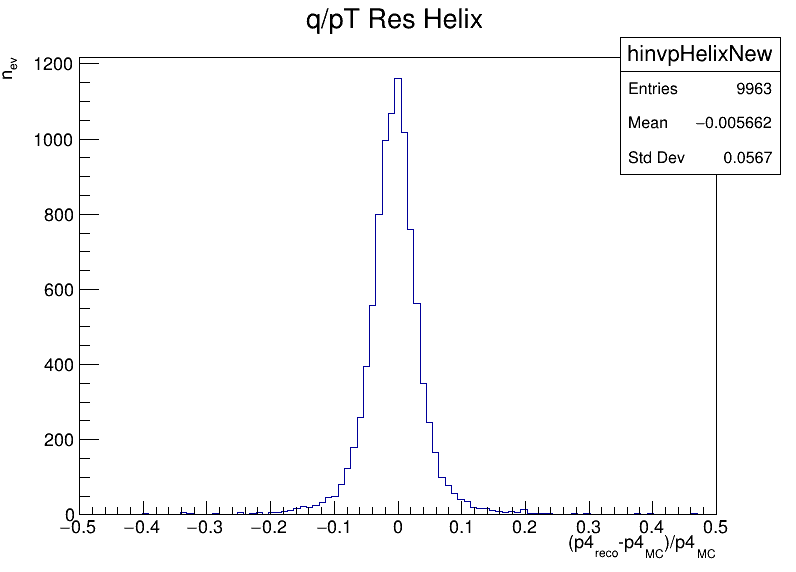

In [79]:
cipK = ROOT.TCanvas("myCanvasNameipK","The Canvas TitlepK",800,600)
#gPad.SetLogy()
hp4Kalman.SetTitle("q/pT Res Kalman;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
hp4Kalman.Draw()
#hp4Kalman.Fit("gaus")
cipK.Draw()
save=folder+"Kalman_p4_Resid"+png
cipK.Print(save)

cipH = ROOT.TCanvas("myCanvasNameipH","The Canvas TitlepH",800,600)
#gPad.SetLogy()
hp4Helix.SetTitle("q/pT Res GAr-Lite std;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
hp4Helix.Draw()
#hp4Helix.Fit("gaus")
cipH.Draw()
save=folder+"Garlite_p4_Resid"+png
cipH.Print(save)

cipHn = ROOT.TCanvas("myCanvasNameipHn","The Canvas TitlepHn",800,600)
#gPad.SetLogy()
hp4HelixNew.SetTitle("q/pT Res Helix;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
hp4HelixNew.Draw()
#hp4HelixNew.Fit("gaus")
cipHn.Draw()
save=folder+"Helix_p4_Resid"+png
cipHn.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: p0H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Helix_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: p1H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Helix_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: p2H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Helix_p2_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: p3H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_

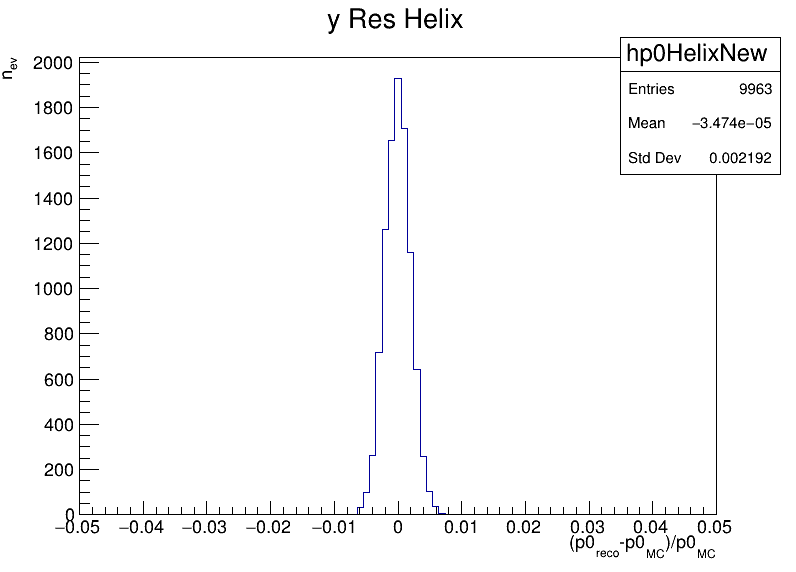

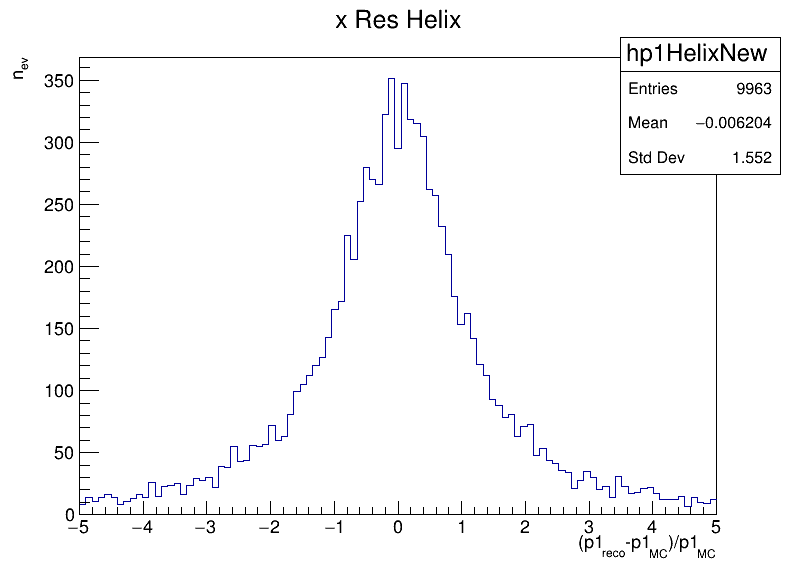

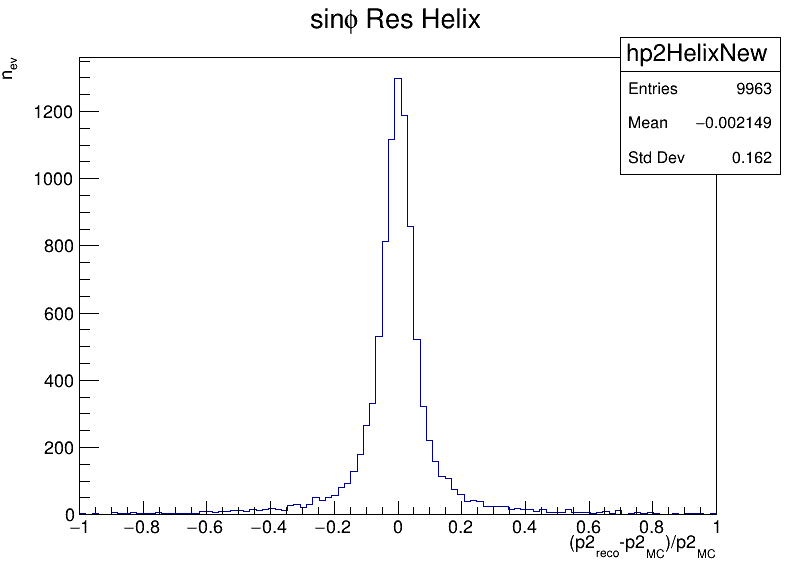

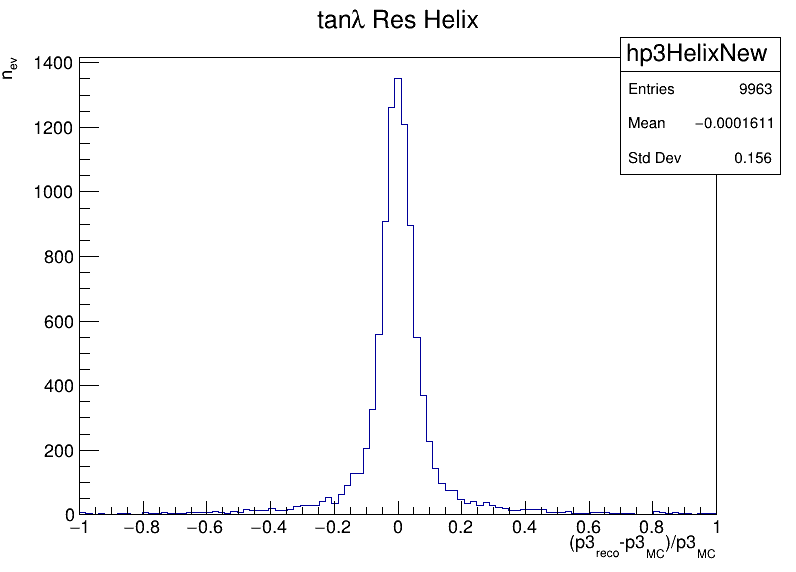

In [80]:
cp0H = ROOT.TCanvas("p0H","p0H",800,600)
#gPad.SetLogy()
hp0HelixNew.SetTitle("y Res Helix;(p0_{reco}-p0_{MC})/p0_{MC};n_{ev}")
hp0HelixNew.Draw()
#hp0HelixNew.Fit("gaus")
cp0H.Draw()
save=folder+"Helix_p0_Resid"+png
cp0H.Print(save)

cp1H = ROOT.TCanvas("p1H","p1H",800,600)
#gPad.SetLogy()
hp1HelixNew.SetTitle("x Res Helix;(p1_{reco}-p1_{MC})/p1_{MC};n_{ev}")
hp1HelixNew.Draw()
#hp1HelixNew.Fit("gaus")
cp1H.Draw()
save=folder+"Helix_p1_Resid"+png
cp1H.Print(save)

cp2H = ROOT.TCanvas("p2H","p2H",800,600)
#gPad.SetLogy()
hp2HelixNew.SetTitle("sin#phi Res Helix;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
hp2HelixNew.Draw()
#hp2HelixNew.Fit("gaus")
cp2H.Draw()
save=folder+"Helix_p2_Resid"+png
cp2H.Print(save)

cp3H = ROOT.TCanvas("p3H","p3H",800,600)
#gPad.SetLogy()
hp3HelixNew.SetTitle("tan#lambda Res Helix;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
hp3HelixNew.Draw()
#hp3HelixNew.Fit("gaus")
cp3H.Draw()
save=folder+"Helix_p3_Resid"+png
cp3H.Print(save)



Warning in <TCanvas::Constructor>: Deleting canvas with same name: p0H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Kalman_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: p1H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Kalman_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: p2H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/OxfordCode/Kalman_Garlite/MCgarlite/6planes/MC1GeV_aliceseed_Eloss_MS_kalman_Eloss_MS/Kalman_p2_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: p3H
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federi

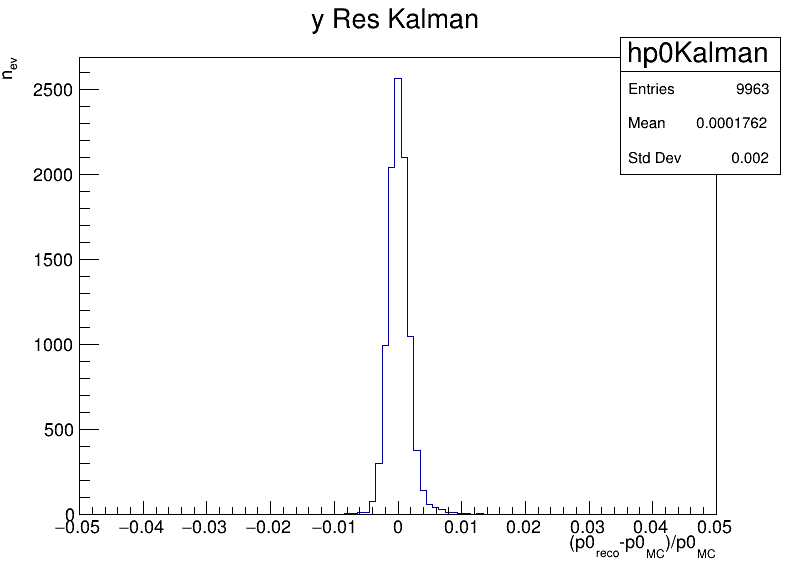

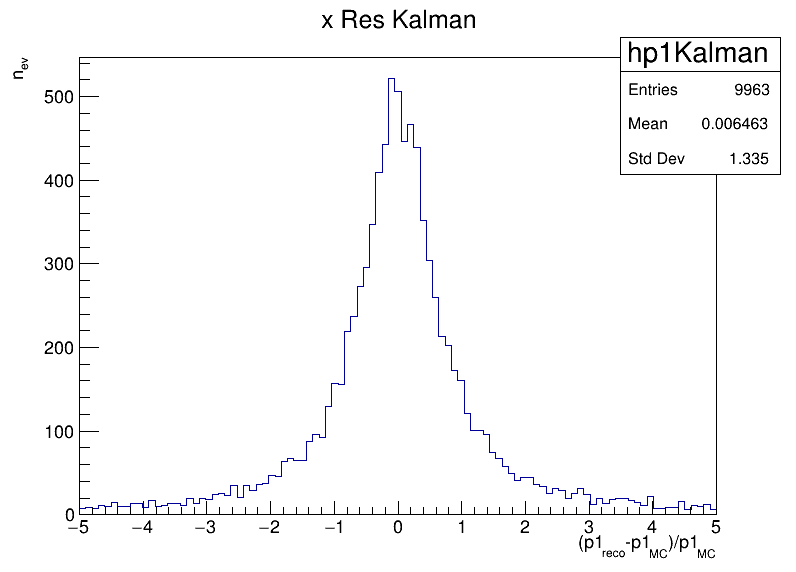

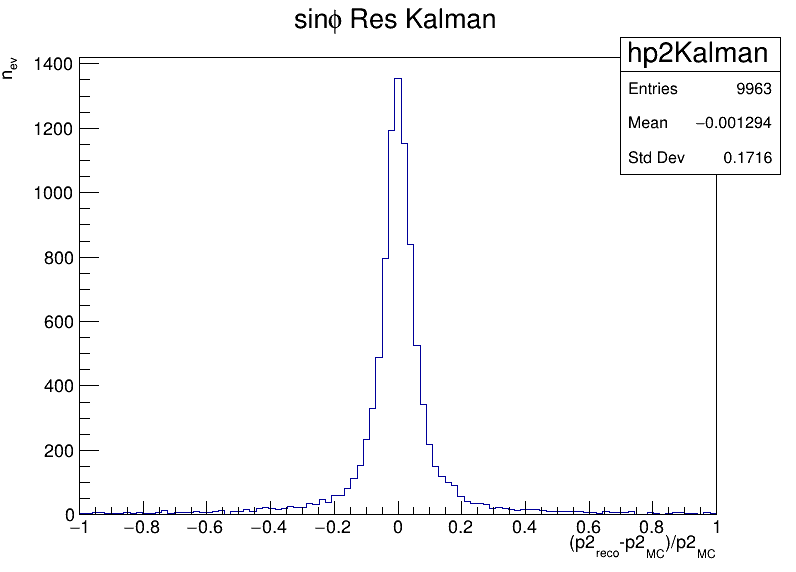

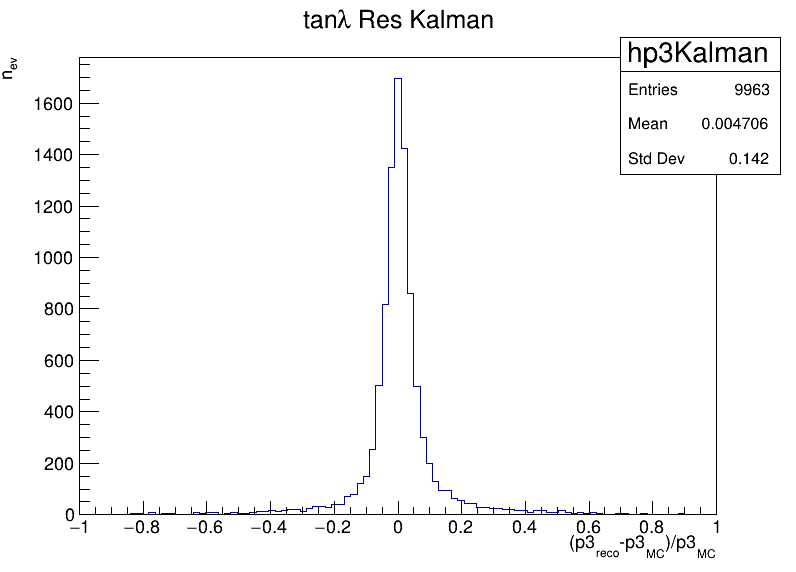

In [81]:
cp0H = ROOT.TCanvas("p0H","p0H",800,600)
#gPad.SetLogy()
hp0Kalman.SetTitle("y Res Kalman;(p0_{reco}-p0_{MC})/p0_{MC};n_{ev}")
hp0Kalman.Draw()
#hp0Kalman.Fit("gaus")
cp0H.Draw()
save=folder+"Kalman_p0_Resid"+png
cp0H.Print(save)

cp1H = ROOT.TCanvas("p1H","p1H",800,600)
#gPad.SetLogy()
hp1Kalman.SetTitle("x Res Kalman;(p1_{reco}-p1_{MC})/p1_{MC};n_{ev}")
hp1Kalman.Draw()
#hp1Kalman.Fit("gaus")
cp1H.Draw()
save=folder+"Kalman_p1_Resid"+png
cp1H.Print(save)

cp2H = ROOT.TCanvas("p2H","p2H",800,600)
#gPad.SetLogy()
hp2Kalman.SetTitle("sin#phi Res Kalman;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
hp2Kalman.Draw()
#hp2Kalman.Fit("gaus")
cp2H.Draw()
save=folder+"Kalman_p2_Resid"+png
cp2H.Print(save)

cp3H = ROOT.TCanvas("p3H","p3H",800,600)
#gPad.SetLogy()
hp3Kalman.SetTitle("tan#lambda Res Kalman;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
hp3Kalman.Draw()
#hp3Kalman.Fit("gaus")
cp3H.Draw()
save=folder+"Kalman_p3_Resid"+png
cp3H.Print(save)